# The State of Police Violence in America

### By Christian Nnabuihe

In [5]:
import bqplot
from bqplot import pyplot as plt

import pandas as pd

import ipywidgets

In [8]:
police_original = pd.read_csv("MPVDatasetDownload.csv")

In [9]:
police = police_original
del police["Unnamed: 4"]

In [10]:
years = []
charges = []
for i in range(len(police)):
    years.append(police.iloc[i][1][-2:])
    charges.append(police.iloc[i][3])
years_set = set(years)
years_short = sorted(years_set)

for charge in charges:
    if charge[0:7] == "Charged":
        charges[charges.index(charge)] = "Charged"

combined = []
for i in range(len(charges)):
    mini_list = []
    mini_list.append(years[i])
    mini_list.append(charges[i])
    combined.append(mini_list)

In [11]:
crime_dict = {}
for year in years_short:
    charge_count = 0
    no_charge_count = 0
    for container in combined:
        if container[0] == year:
            if container[1] == "Charged":
                charge_count += 1
            elif container[1] == "No known charges":
                no_charge_count += 1
    total_reports = charge_count + no_charge_count
    crime_dict[year] = {"No known charges": no_charge_count, "Charged": charge_count, "Total": total_reports}

In [29]:
fig = plt.figure(title="Total Police Charges Over the Years", animation_duration=1000)

pie = plt.pie(sizes = [crime_dict[year]["Total"] for year in list(crime_dict.keys())],
              labels =[f"'{key}" for key in crime_dict.keys()],
              display_values = True,
              values_format=".0f",
              display_labels='outside',
              interactions={'click':'select'},
              selected_style={'fill':'blue'})

pie.stroke="black"
pie.colors = ["tomato","lawngreen", "skyblue", "yellow", "orange", "purple", 'brown', 'red', 'cadetblue']


pie.radius = 125
pie.inner_radius = 0

pie.label_color = 'orangered'
pie.font_size = '20px'
pie.font_weight = 'bold'

In [30]:
val = '20'
data = crime_dict[val]

fig2 = plt.figure(title=f"Charge Distribution in This Year")

fig2.layout.height = "400px"
fig2.layout.width = "600px"

bar_chart = plt.bar(x = list(data.keys())[:-1], y= list(data.values())[:-1])

bar_chart.colors = ["tomato"]

plt.xlabel("Charges?")
plt.ylabel("Frequency")


In [31]:
def on_selection(change):
    if len(change['owner'].selected==1): # only allow user to select one grid
        plt.clear()
        i = change['owner'].selected[0]
        year_selected = str(i + 13)
        val = year_selected
        v = crime_dict[year_selected]
        
        
        data = crime_dict[str(i + 13)]
        bar_chart = plt.bar(x = list(data.keys())[:-1], y= list(data.values())[:-1])
        bar_chart.colors = [change['owner'].colors[i]]
        
pie.observe(on_selection,'selected')

In [32]:
figures = ipywidgets.HBox([fig,fig2])
fig.layout.min_width='540px'
fig2.layout.min_width='400px'

myDashboard = ipywidgets.VBox([figures])
myDashboard

In this article, I want to use data to visualize the corruption and lack of accountability in police forces in the US. In this first interactive visualization, I have a pie graph showing the total police charges that have taken place between the years 2013 and 2021. They're all similarly sized slices, demonstrating that these issues are not being acknowledged at all. To the right is a bar graph that updates depending on the slice of the left pie that is selected, showing a comparison of known charges to unknown ones. I use this to show that, for every slice, there seems to be an issue with holding officers accountable for their crimes.

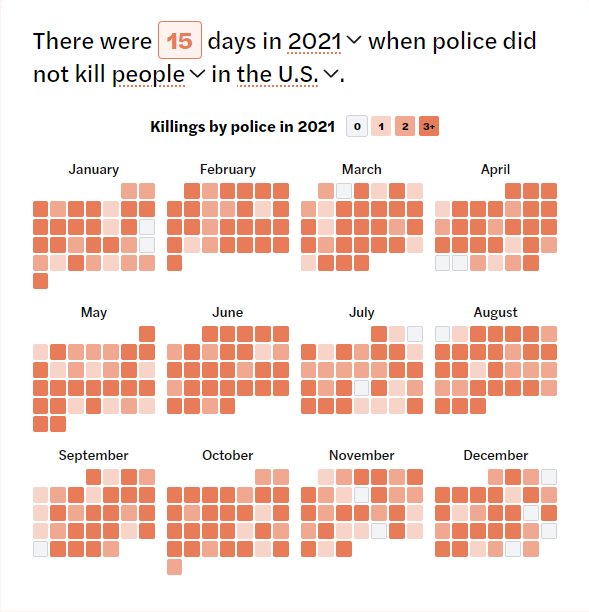
source: mappingpoliceviolence

Here, I have a visualization from the Mapping Police Violence website, which is where my original dataset is from, although I use a processed version from a github user named fourtonfish (link: https://github.com/fourtonfish/exploring-the-mapping-police-violence-dataset). I use this visualization to highlight the amount of killing that occurs yearly in the country. I would also like to add that this comes from a dataset that has been updated post-2021, so it demonstrates that the lack of numbers for 2021 was not a product of a better year, but the product of an incomplete dataset: 2021 was just as bad of a year as the others. To be specific, 1,144 lives were taken by police in this year.

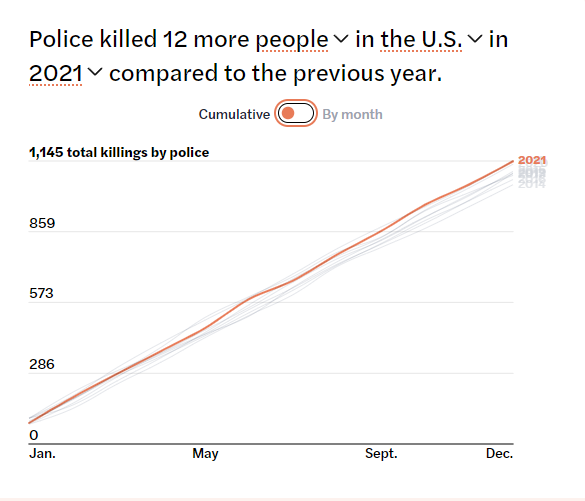
source: mappingpoliceviolence

Finally, I conclude with this image, taken from the same site as the last one - mappingpoliceviolence.org. This is a comparison of the number of murders that have taken place over the years with relation to each other. But this visualization accomplishes more than just that; it also exposes the rate at which these murders happen each year. Every year, the number of murders is at a constant slope from start top finish, exposing the nature of this system. No matter what day, month, or year it is, death with come to civilians by the hands of officers all the same.

I made this article to simply spread awareness of these trends and to make it easier to identify, in the hopes that if people are made aware of this, change may come about. I hope that my visualization, as well as these other supplementary ones, were able to make this issue more pertinent in your minds and I hope that we as a country can do better in the future.